In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataset_info(df):
    display(df.describe(),
    pd.DataFrame({
        'feature': df.columns.values,
        'dtypes': [df[col].dtype for col in df.columns],
        'n_unique': df.nunique().values,
        'n_nan': [df[col].isna().sum() for col in df.columns],
        'n_dupe': [df.duplicated().sum() for row in df.columns],
        'sample_unique': [df[col].unique() for col in df.columns]
        })
    )
    print(f'''
          Total Columns that having missing value = {df.isnull().any().sum()}
          Total Columns that are clean            = {df.shape[1] - df.isnull().any().sum()}
          Total Rows that having missing value    = {df.isnull().sum().sum()}
          Total Rows                              = {df.shape[0]}
          Totol Percentage of missing value      = {(df.isnull().sum().sum()/np.prod(df.shape)) * 100}
          ''')

In [3]:
def class_pie(class_counts):
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    
    legend_labels = [f'{index}: {count}' for index, count in zip(class_counts.index, class_counts)]
    plt.legend(legend_labels, title='Quality Counts', loc='upper right')
    plt.tight_layout()
    plt.show()

# Cars dataset

In [2]:
df = pd.read_csv("cars/car_data.csv")
display(df.head(2), df.sample(2), df.tail(2))

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0


,User ID,Gender,Age,AnnualSalary,Purchased
348,883,Female,46,41000,1
208,935,Male,45,32000,1


,User ID,Gender,Age,AnnualSalary,Purchased
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [3]:
df = df.drop(columns={"User ID"})
df = df.drop_duplicates()
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [10]:
dataset_info(df)

,Age,AnnualSalary,Purchased
count,943.00000,943.000000,943.000000
mean,40.04666,73575.291622,0.415695
std,10.85036,35053.956806,0.493103
min,18.00000,15000.000000,0.000000
25%,32.00000,46500.000000,0.000000
50%,40.00000,72500.000000,0.000000
75%,48.00000,91500.000000,1.000000
max,63.00000,152500.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Gender,object,2,0,0,"[Male, Female]"
1,Age,int64,46,0,0,"[35, 40, 49, 25, 47, 46, 42, 30, 41, 32, 27, 3..."
2,AnnualSalary,int64,247,0,0,"[20000, 43500, 74000, 107500, 79000, 33500, 13..."
3,Purchased,int64,2,0,0,"[0, 1]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 4
          Total Rows that having missing value    = 0
          Total Rows                              = 943
          Totol Percentage of missing value      = 0.0
          


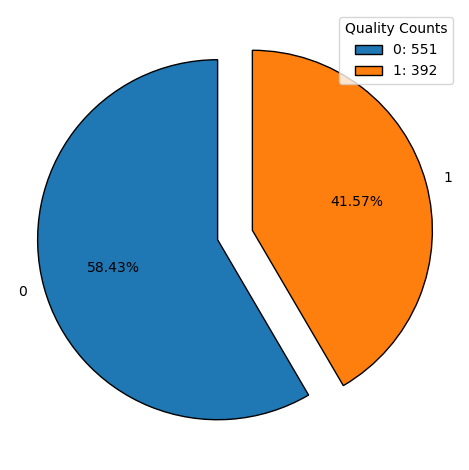

In [15]:
class_pie(df["Purchased"].value_counts())

In [4]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.sample(5)

,Gender,Age,AnnualSalary,Purchased
966,1,48,133500,1
212,1,20,82000,0
501,1,46,22000,0
399,0,45,151500,1
300,0,49,81500,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Purchased"})
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (754, 3)
X_test = (189, 3)


In [6]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_car = pd.DataFrame(X_train_const)
X_test_car = pd.DataFrame(X_test_const)

X_train_car.sample(5)

,0,1,2,3
350,1.0,0.958423,-0.373346,-0.453343
655,1.0,0.958423,0.084680,-0.668144
701,1.0,0.958423,1.733574,-1.298227
133,1.0,-1.043380,-0.464951,-0.439022
553,1.0,0.958423,-1.655819,-1.627589


In [7]:
X_train_car.to_csv("cars/car_X_train.csv", index=False)
X_test_car.to_csv("cars/car_X_test.csv", index=False)
y_train.to_csv("cars/car_y_train.csv", index=False)
y_test.to_csv("cars/car_y_test.csv", index=False)

# HR score

In [2]:
df = pd.read_csv("hr_score/hr_score.csv")
display(df.head(2), df.sample(2), df.tail(2))

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
177,0.066667,0.436749,0.666667,0.7,0.5,0.179487,0.147484,0.240674,0.308472,0
284,0.333333,0.582487,1.000000,0.8,0.8,0.717949,0.693172,0.536290,0.757051,1


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
298,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1
299,0.600000,0.754280,0.222222,0.7,0.8,0.820513,0.936553,0.793214,0.718935,1


In [3]:
df = df.drop_duplicates()

In [7]:
dataset_info(df)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,years_of_experience,float64,16,0,0,"[0.3333333333333333, 0.1333333333333333, 0.0, ..."
1,functional_competency_score,float64,283,0,0,"[0.7494977777777777, 0.4906377777777777, 0.460..."
2,top1_skills_score,float64,10,0,0,"[0.7777777777777778, 0.4444444444444444, 0.555..."
3,top2_skills_score,float64,10,0,0,"[0.7, 0.3, 0.4, 0.8, 0.6, 0.5, 0.1, 1.0, 0.2, ..."
4,top3_skills_score,float64,11,0,0,"[0.8, 0.4, 0.3, 0.5, 0.6, 0.2, 0.7, 0.9, 1.0, ..."
5,behavior_competency_score,float64,39,0,0,"[0.7692307692307692, 0.1538461538461538, 0.051..."
6,top1_behavior_skill_score,float64,300,0,0,"[0.9316893589492192, 0.3520927425880082, 0.052..."
7,top2_behavior_skill_score,float64,300,0,0,"[0.6620421671026925, 0.1322306051248566, 0.089..."
8,top3_behavior_skill_score,float64,300,0,0,"[0.7524629947278958, 0.3169054776707523, 0.254..."
9,call_for_interview,int64,2,0,0,"[1, 0]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 10
          Total Rows that having missing value    = 0
          Total Rows                              = 300
          Totol Percentage of missing value      = 0.0
          


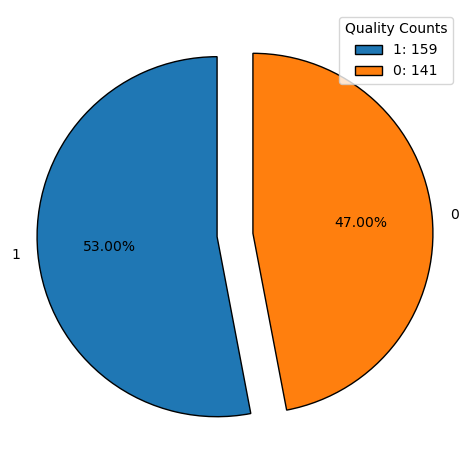

In [10]:
class_pie(df["call_for_interview"].value_counts())

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"call_for_interview"})
y = df["call_for_interview"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (240, 9), y_train = (240,)
X_test = (60, 9), y_test = (60,)


In [5]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_hr = pd.DataFrame(X_train_const)
X_test_hr = pd.DataFrame(X_test_const)

X_train_hr.sample(5)

,0,1,2,3,4,5,6,7,8,9
182,1.0,-1.007310,-0.481140,-0.094134,-0.503459,0.275709,-1.003982,-0.708973,-1.038379,-1.113462
215,1.0,-1.007310,0.149137,-0.094134,-1.363460,-1.005002,-0.614873,0.001038,-0.760019,-0.609573
88,1.0,0.082902,0.886072,0.827991,0.786543,0.275709,0.552454,0.964062,1.062736,0.727742
115,1.0,0.900560,1.452223,1.289053,1.216543,1.556420,1.525226,1.240789,1.320989,1.349331
223,1.0,-0.462204,-0.060180,-0.094134,-1.363460,-0.578099,-0.614873,-0.620032,-0.214083,-0.913095


In [7]:
X_train_hr.to_csv("hr_score/hr_X_train.csv", index=False)
X_test_hr.to_csv("hr_score/hr_X_test.csv", index=False)
y_train.to_csv("hr_score/hr_y_train.csv", index=False)
y_test.to_csv("hr_score/hr_y_test.csv", index=False)

# Loan eligibility

In [4]:
df = pd.read_csv("loan_data/loan_data.csv")
display(df.head(2), df.sample(2), df.tail(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
438,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df = df.drop(columns={"Loan_ID"})
df = df.dropna()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(0,5):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])  
df.iloc[:,10] = le.fit_transform(df.iloc[:,10])
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
254,1,0,0,0,1,16250,0.0,192.0,360.0,0.0,2,0
393,1,1,2,1,0,1993,1625.0,113.0,180.0,1.0,1,1
599,1,1,2,0,0,5780,0.0,192.0,360.0,1.0,2,1
459,1,1,0,0,0,8334,0.0,160.0,360.0,1.0,1,0
209,1,0,0,0,0,3418,0.0,127.0,360.0,1.0,1,0
163,1,1,2,0,0,4167,1447.0,158.0,360.0,1.0,0,1
486,1,0,2,0,0,3547,0.0,80.0,360.0,0.0,0,0
106,1,1,2,0,0,11417,1126.0,225.0,360.0,1.0,2,1
250,1,1,0,1,0,1668,3890.0,201.0,360.0,0.0,1,0
475,1,1,2,0,1,16525,1014.0,150.0,360.0,1.0,0,1


In [10]:
dataset_info(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Gender,object,2,0,0,"[1, 0]"
1,Married,object,2,0,0,"[1, 0]"
2,Dependents,object,4,0,0,"[1, 0, 2, 3]"
3,Education,object,2,0,0,"[0, 1]"
4,Self_Employed,object,2,0,0,"[0, 1]"
5,ApplicantIncome,int64,405,0,0,"[4583, 3000, 2583, 6000, 5417, 2333, 3036, 400..."
6,CoapplicantIncome,float64,232,0,0,"[1508.0, 0.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."
7,LoanAmount,float64,186,0,0,"[128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0..."
8,Loan_Amount_Term,float64,9,0,0,"[360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240...."
9,Credit_History,float64,2,0,0,"[1.0, 0.0]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 12
          Total Rows that having missing value    = 0
          Total Rows                              = 480
          Totol Percentage of missing value      = 0.0
          


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Loan_Status"})
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (384, 11)
X_test = (96, 11)


In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_loan = pd.DataFrame(X_train_const)
X_test_loan = pd.DataFrame(X_test_const)

X_train_loan.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11
295,1.0,0.472155,0.761739,-0.751502,-0.496743,-0.426073,0.084026,0.150984,0.871367,0.280345,0.426073,-1.329180
90,1.0,0.472155,0.761739,2.223515,-0.496743,-0.426073,-0.118391,-0.590022,-0.564206,0.280345,0.426073,-0.046755
321,1.0,0.472155,-1.312785,-0.751502,2.013115,-0.426073,-0.363361,0.223136,-0.227946,-2.397575,-2.347014,1.235670
361,1.0,-2.117950,0.761739,-0.751502,-0.496743,-0.426073,-0.177210,0.294207,-0.434875,0.280345,0.426073,1.235670
292,1.0,-2.117950,0.761739,0.240171,-0.496743,2.347014,2.312091,-0.590022,5.902337,0.280345,0.426073,-0.046755


In [14]:
X_train_loan.to_csv("loan_data/loan_X_train.csv", index=False)
X_test_loan.to_csv("loan_data/loan_X_test.csv", index=False)
y_train.to_csv("loan_data/loan_y_train.csv", index=False)
y_test.to_csv("loan_data/loan_y_test.csv", index=False)